# Build a TB model for hBN

In [1]:
from pythtb import tb_model
import numpy as np
import matplotlib.pyplot as plt

# Define lattice vectors for a 2D hexagonal lattice
lat = [[1.0, 0.0,0.0], [0.5, np.sqrt(3)/2,0.0],[0.0,0.0,10.0]]  # a1 and a2 vectors

# Define orbital positions (Boron at (0,0) and Nitrogen at (1/3, 1/3))
orb = [[0.0, 0.0, 0.0], [1/3, 1/3, 0.0]]  # Orbital positions within the unit cell

# Create the tight-binding model for 3D system (2D hexagonal lattice in 3D space)
model = tb_model(3, 3, lat, orb)
delta = 0.0
# Set on-site energies for the two orbitals (Boron and Nitrogen)
model.set_onsite([-delta, delta])  # ε_B = -1.0, ε_N = 1.0

# Set the hopping parameter between Boron and Nitrogen
t_BN = 1.0  # Hopping parameter between B and N

# Set the hopping terms
model.set_hop(t_BN, 0, 1, [0, 0, 0])  # Intra-cell B-N hopping
model.set_hop(t_BN, 0, 1, [1, 0, 0])  # B-N hopping in the +a1 direction
model.set_hop(t_BN, 0, 1, [0, 1, 0])  # B-N hopping in the +a2 direction
model.set_hop(t_BN, 0, 1, [-1, 1, 0]) # B-N hopping in the -a1 + a2 direction


---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     1.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,   0.866 ,     0.0 ]
 #  2  ===>  [     0.0 ,     0.0 ,    10.0 ]
positions of orbitals:
 #  0  ===>  [  0.3333 ,  0.3333 ,     0.0 ]
 #  1  ===>  [  0.6667 ,  0.6667 ,     0.0 ]
site energies:
 #  0  ===>      -2.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  1 | H |  0 + [  1 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  1 | H |  0 + [  0 ,  1 ,  0 ] >     ===>      1.0 +     0.0 i
hopping distances:
|  pos(  0 )  - pos(  1 + [  0 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  0 + [  1 ,  0 ,  0 ] ) |  =    0.5774
|  pos(  1 )  - pos(  

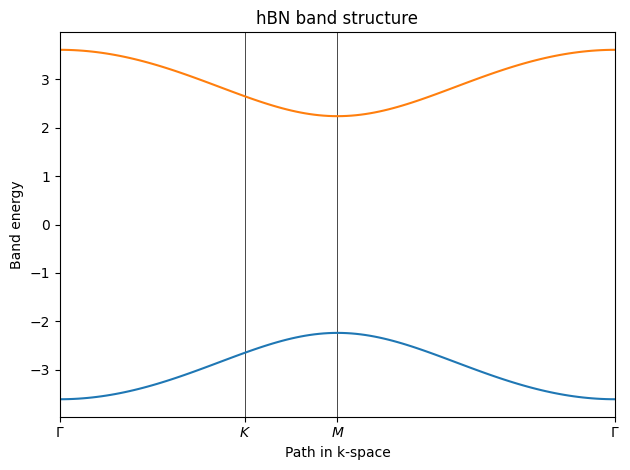

In [22]:
#!/usr/bin/env python

# Toy graphene model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat=[[1.0,0.0,0.0],[0.5,np.sqrt(3.0)/2.0,0.0],[0.0,0.0,10.0]]
# define coordinates of orbitals
orb=[[1./3.,1./3., 0.0],[2./3.,2./3., 0.0]]

# make two dimensional tight-binding graphene model
my_model=tb_model(3,3,lat,orb)

# set model parameters
delta=2.0
t=1.0

# set on-site energies
my_model.set_onsite([-delta,delta])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
my_model.set_hop(t, 0, 1, [ 0, 0, 0])
my_model.set_hop(t, 1, 0, [ 1, 0, 0])
my_model.set_hop(t, 1, 0, [ 0, 1, 0])

# print tight-binding model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.0],[1./3.,1./3.,0.0],[.5,.5,0.0],[0.,0.,0.0]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_model: the pythtb model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

---------------------------------------
report of tight-binding model
---------------------------------------
k-space dimension           = 3
r-space dimension           = 3
number of spin components   = 1
periodic directions         = [0, 1, 2]
number of orbitals          = 2
number of electronic states = 2
lattice vectors:
 #  0  ===>  [     0.0 ,     0.5 ,     0.5 ]
 #  1  ===>  [     0.5 ,     0.0 ,     0.5 ]
 #  2  ===>  [     0.5 ,     0.5 ,     0.0 ]
positions of orbitals:
 #  0  ===>  [     0.0 ,     0.0 ,     0.0 ]
 #  1  ===>  [     0.5 ,     0.5 ,     0.5 ]
site energies:
 #  0  ===>      -6.0
 #  1  ===>       2.0
hoppings:
<  0 | H |  0 + [  1 ,  0 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  1 ,  0 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  0 + [  0 ,  0 ,  1 ] >     ===>     -0.5 +     0.0 i
<  0 | H |  1 + [  0 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  1 ,  0 ,  0 ] >     ===>      1.0 +     0.0 i
<  0 | H |  1 + [  0 ,  1 ,  0 

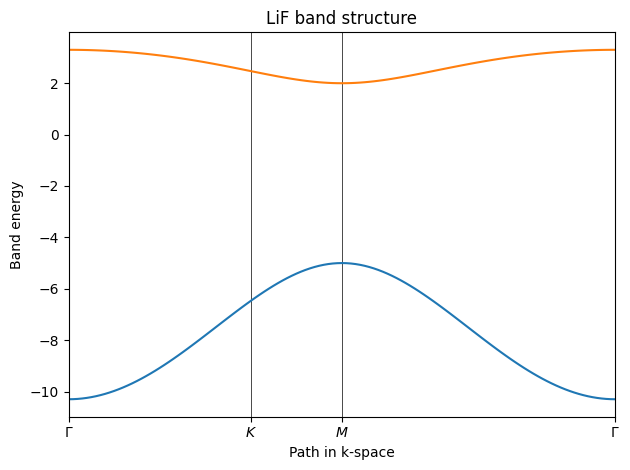

In [18]:
#!/usr/bin/env python

# Toy graphene my_model

# Copyright under GNU General Public License 2010, 2012, 2016
# by Sinisa Coh and David Vanderbilt (see gpl-pythtb.txt)

from __future__ import print_function
from pythtb import * # import TB my_model class
import numpy as np
import matplotlib.pyplot as plt

# define lattice vectors
lat = [[0.0, 0.5, 0.5],
       [0.5, 0.0, 0.5],
       [0.5, 0.5, 0.0]]
# define coordinates of orbitals
orb = [[0.0, 0.0, 0.0],  # Fluorine site
       [0.5, 0.5, 0.5]]  # Lithium site

# make two dimensional tight-binding graphene my_model
my_model=tb_model(3,3,lat,orb)

# set my_model parameters
E_F_2p = -6.0  # Example energy for F 2p orbital (in eV)
E_Li_2s = 2.0  # Example energy for Li 2s orbital (in eV)

t_FF=-0.5
t_LiF=1.0

# Set the on-site energies
my_model.set_onsite([E_F_2p, E_Li_2s])
# set hoppings (one for each connected pair of orbitals)
# (amplitude, i, j, [lattice vector to cell containing j])
# Add hopping between Fluorine p-orbitals (nearest neighbors in FCC)
my_model.set_hop(t_FF, 0, 0, [1, 0, 0])
my_model.set_hop(t_FF, 0, 0, [0, 1, 0])
my_model.set_hop(t_FF, 0, 0, [0, 0, 1])

# Add hopping between Lithium and Fluorine
my_model.set_hop(t_LiF, 0, 1, [0, 0, 0])  # between Li and F
my_model.set_hop(t_LiF, 0, 1, [1, 0, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 1, 0])
my_model.set_hop(t_LiF, 0, 1, [0, 0, 1])

# print tight-binding my_model
my_model.display()

# generate list of k-points following a segmented path in the BZ
# list of nodes (high-symmetry points) that will be connected
path=[[0.,0.,0.],[1./3.,1./3,0.],[0.5,0.5,0.],[0.,0.,0.]]
# labels of the nodes
label=(r'$\Gamma $',r'$K$', r'$M$', r'$\Gamma $')
# total number of interpolated k-points along the path
nk=121

# call function k_path to construct the actual path
(k_vec,k_dist,k_node)=my_model.k_path(path,nk)
(q_vec,q_dist,q_node)=my_model.k_path(path,nk)
# inputs:
#   path, nk: see above
#   my_my_model: the pythtb my_model
# outputs:
#   k_vec: list of interpolated k-points
#   k_dist: horizontal axis position of each k-point in the list
#   k_node: horizontal axis position of each original node

print('---------------------------------------')
print('starting calculation')
print('---------------------------------------')
print('Calculating bands...')

# obtain eigenvalues to be plotted
evals=my_model.solve_all(k_vec)

# figure for bandstructure

fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# set vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("LiF band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
ax.plot(k_dist,evals[0])
ax.plot(k_dist,evals[1])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [23]:
class tmp_lat():
    def __init__(self,lat):
        self.lat = np.array(lat)
        self.lat_vol = np.abs(np.dot(self.lat[2],np.cross(self.lat[0],self.lat[1])))
        self.rec_lat = self._rec_lat()
        self.rlat_vol = np.abs(np.dot(self.rec_lat[2],np.cross(self.rec_lat[0],self.rec_lat[1])))
    
    def _rec_lat(self):
        b1 = 2 * np.pi * np.cross(self.lat[1], self.lat[2]) / self.lat_vol
        b2 = 2 * np.pi * np.cross(self.lat[2], self.lat[0]) / self.lat_vol
        b3 = 2 * np.pi * np.cross(self.lat[0], self.lat[1]) / self.lat_vol

        # Combine the reciprocal lattice vectors into a matrix
        B = np.array([b1, b2, b3])        
        return B

In [24]:
c_lat = tmp_lat(lat)

In [25]:
from yambopy import *
nnkp_kgrid = mp_grid(nx = 10 , ny = 10 , nz = 1, latdb=c_lat)
nnkp_qgrid = mp_grid (nx = 5 , ny = 5, nz = 1, latdb=c_lat )

In [26]:
qlist = k_list(q_vec, c_lat)

In [27]:
# we need a temporary model class to call H2P without initializing wann_model
class mytb_model():
    def __init__(self, pythtb_model, nc, nv, nnkp_kgrid, eigv, eigvec):
        self.nk = nnkp_kgrid.k.shape[0]
        self.mpgrid = nnkp_kgrid
        self.nb = eigv.shape[1]
        self.nc = nc 
        self.nv = nv
        self.eigv = eigv
        self.eigvec = eigvec
        self._get_T_table()
        self.pythtb_model = pythtb_model

    def _get_T_table(self):
        ntransitions = self.nk*self.nc*self.nv
        T_table = np.zeros((ntransitions, 3),dtype=int)
        t_index = 0
        for ik in range(0,self.nk):
            for iv in range(0,self.nv):
                for ic in range(0,self.nc):
                        T_table[t_index] = [ik, iv, self.nv+ic]
                        t_index += 1
        self.ntransitions = ntransitions
        self.T_table = T_table

In [28]:
# get eigenvalues and eigenvectors from pythtb
eigv, eigvec = my_model.solve_all(nnkp_kgrid.k, eig_vectors=True)

In [29]:
# swap axes to match conventions from our yambopy-wannier library
eigv = my_model.solve_all(nnkp_kgrid.k).swapaxes(0,1)
eigvec = eigvec.transpose(1, 2, 0)

In [30]:
# Initialize H2P with this model
model = mytb_model(pythtb_model = my_model, nc=1, nv=1, nnkp_kgrid = nnkp_kgrid, eigv = eigv, eigvec = eigvec)

In [31]:
cpot = CoulombPotentials(v0=0.00,ngrid=[10,10,1], lattice=c_lat, ediel=[1.0,1.0,1.0])

Warning! CoulombPotentials works with atomic units and return energy in eV 

                Check consistency of units in the methods, they have not been properly tested
              


In [12]:
cpot.rlat[1]

array([0.5      , 0.8660254, 0.       ])

In [13]:
cpot.v2dk([0.0,0.0,0.0], [0.0,0.0,0.0])

5.53009583491626395

In [32]:
# we can call this only with 
h2p_tmp = H2P(model, qmpgrid = nnkp_qgrid, method = 'model', cpot = cpot,bse_bands=True, qlist=qlist,ktype='IP', K_d = 0.01, K_ex=0.01)


 Building H2P from model Coulomb potentials. Default is v2dt2

computing bse bands 


In [33]:
h2p_tmp.solve_H2P()

Setting number of qpoints equal to number of q points in the list

Diagonalizing the H2P matrix with dimensions: 100 for q-point: 0


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 1


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 2


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 3


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 4


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 5


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 6


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 7


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 8


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 9


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 10


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 11


Diagonalizing the H2P matrix with dimensions: 100 for q-point: 12


Diagonalizing the H2P matrix with dimensions: 100 for q-poi

In [25]:
h2p_tmp.eigv[0]

array([-2.23606798+0.j,  2.23606798+0.j])

In [33]:
h2p_tmp.h2peigv[1]

array([   2.49711544+0.j,    2.505678  +0.j,    2.51614173+0.j,
          2.52858916+0.j,    2.53676698+0.j,    2.67291282+0.j,
          3.16407254+0.j,    3.17121815+0.j,    3.17976959+0.j,
          3.18935923+0.j,    3.19550552+0.j,    3.36968083+0.j,
          4.43846104+0.j,    4.44047692+0.j,    4.45152003+0.j,
          4.45243447+0.j,    4.45519294+0.j,    4.45527439+0.j,
          4.45535757+0.j,    4.45822903+0.j,    4.46154948+0.j,
          4.46176612+0.j,    4.46197923+0.j,    4.467505  +0.j,
          4.47213583+0.j,    4.47248841+0.j,    4.47691123+0.j,
          4.48242221+0.j,    4.48263312+0.j,    4.48284795+0.j,
          4.48612065+0.j,    4.48896431+0.j,    4.48904631+0.j,
          4.48912647+0.j,    4.49225252+0.j,    4.49326202+0.j,
          4.50394425+0.j,    4.50600576+0.j,    5.28265798+0.j,
          5.65196184+0.j,    5.66219645+0.j,    5.67635754+0.j,
          5.69062757+0.j,    5.70129244+0.j,    5.97477497+0.j,
          6.45611583+0.j,    6.45975899+

Done.



/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
/Users/Reho0001/opt/anaconda3/envs/tbmodels/lib/python3.11/site-packages/matplotlib/cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


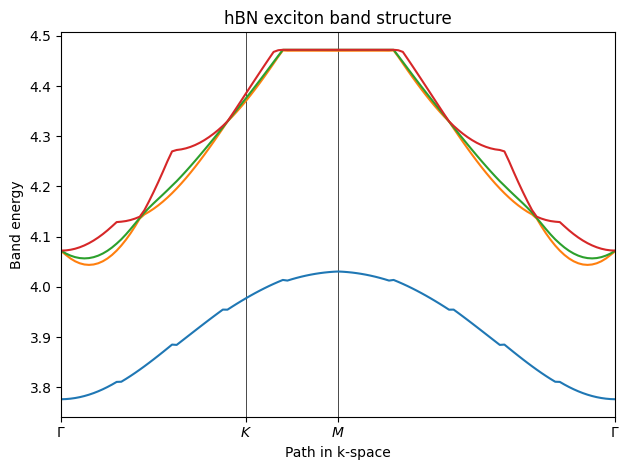

In [35]:
fig, ax = plt.subplots()
# specify horizontal axis details
# set range of horizontal axis
ax.set_xlim(k_node[0],k_node[-1])
# put tickmarks and labels at node positions
ax.set_xticks(k_node)
ax.set_xticklabels(label)
# add vertical lines at node positions
for n in range(len(k_node)):
  ax.axvline(x=k_node[n],linewidth=0.5, color='k')
# put title
ax.set_title("hBN exciton band structure")
ax.set_xlabel("Path in k-space")
ax.set_ylabel("Band energy")

# plot first and second band
for it in range(0,4):#h2p_tmp.h2peigv.shape[1]):
    ax.plot(k_dist,h2p_tmp.h2peigv[:,it])

# make an PDF figure of a plot
fig.tight_layout()
#fig.savefig("graphene.pdf")

print('Done.\n')

In [21]:
h2p_tmp.h2peigv[0]

array([2.55818427+0.j, 2.66828835+0.j, 2.75384383+0.j, 2.85171875+0.j,
       2.87728856+0.j, 2.88785467+0.j, 2.90544503+0.j, 2.94611321+0.j,
       2.95935836+0.j, 4.62484826+0.j, 4.86612468+0.j, 4.86886139+0.j,
       5.00169653+0.j, 5.00221109+0.j, 5.04721051+0.j, 6.35522887+0.j])

In [16]:
!pwd

/Users/Reho0001/workQE/Projects/mlxwf


# Visualize the grid and neighbours

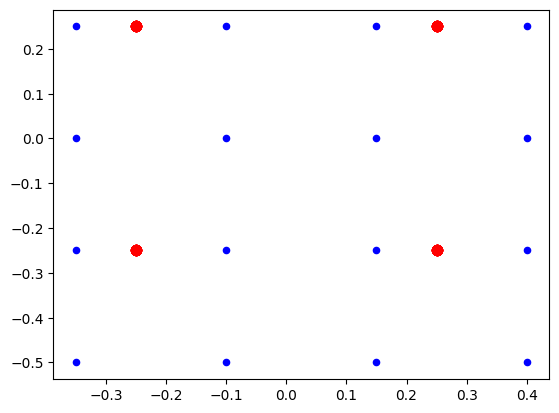

In [26]:
nnkp_kgrid = mp_grid(nx = 4 , ny = 4 , nz = 1, latdb=c_lat,shift=[0.4,0.0,0.0])
fig,ax = plt.subplots()
neigh = nnkp_kgrid.fold_into_bz(nnkp_kgrid.b_grid)
for ik,k in enumerate(nnkp_kgrid.k):
    ax.scatter(k[0], k[1], s = 20, c='blue')
    for j in range(0,8):
        ax.scatter(neigh[8*ik+j,0],neigh[8*ik+j,1], s=50,c = 'red')

In [28]:
nnkp_kgrid.k

array([[-0.1 , -0.5 , -0.5 ],
       [-0.1 , -0.25, -0.5 ],
       [-0.1 ,  0.  , -0.5 ],
       [-0.1 ,  0.25, -0.5 ],
       [ 0.15, -0.5 , -0.5 ],
       [ 0.15, -0.25, -0.5 ],
       [ 0.15,  0.  , -0.5 ],
       [ 0.15,  0.25, -0.5 ],
       [ 0.4 , -0.5 , -0.5 ],
       [ 0.4 , -0.25, -0.5 ],
       [ 0.4 ,  0.  , -0.5 ],
       [ 0.4 ,  0.25, -0.5 ],
       [-0.35, -0.5 , -0.5 ],
       [-0.35, -0.25, -0.5 ],
       [-0.35,  0.  , -0.5 ],
       [-0.35,  0.25, -0.5 ]])

# Build H2P and compute exciton band structure